In [5]:
pip install pandas scikit-learn numpy matplotlib seaborn


In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import resample
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!cp -r /content/drive/MyDrive/url_dataset /content/

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
data = pd.read_csv('/content/url_dataset/All.csv')

for col in data.select_dtypes(include=np.number).columns:
    print(f'{col}: {np.isinf(data[col]).sum()}')

for col in data.select_dtypes(include=np.number).columns:
    data[col].replace([np.inf, -np.inf], np.nan, inplace=True)

print(data.isnull().sum())

numeric_data = data.select_dtypes(include=np.number)
data.fillna(numeric_data.mean(), inplace=True)


scaler = StandardScaler()

numeric_features = data.select_dtypes(include=np.number)
data_scaled = scaler.fit_transform(numeric_features)

data_scaled = pd.DataFrame(data_scaled, columns=numeric_features.columns)

Querylength: 0
domain_token_count: 0
path_token_count: 0
avgdomaintokenlen: 0
longdomaintokenlen: 0
avgpathtokenlen: 0
tld: 0
charcompvowels: 0
charcompace: 0
ldl_url: 0
ldl_domain: 0
ldl_path: 0
ldl_filename: 0
ldl_getArg: 0
dld_url: 0
dld_domain: 0
dld_path: 0
dld_filename: 0
dld_getArg: 0
urlLen: 0
domainlength: 0
pathLength: 0
subDirLen: 0
fileNameLen: 0
this.fileExtLen: 0
ArgLen: 0
pathurlRatio: 0
ArgUrlRatio: 0
argDomanRatio: 0
domainUrlRatio: 0
pathDomainRatio: 0
argPathRatio: 10
executable: 0
isPortEighty: 0
NumberofDotsinURL: 0
ISIpAddressInDomainName: 0
CharacterContinuityRate: 0
LongestVariableValue: 0
URL_DigitCount: 0
host_DigitCount: 0
Directory_DigitCount: 0
File_name_DigitCount: 0
Extension_DigitCount: 0
Query_DigitCount: 0
URL_Letter_Count: 0
host_letter_count: 0
Directory_LetterCount: 0
Filename_LetterCount: 0
Extension_LetterCount: 0
Query_LetterCount: 0
LongestPathTokenLength: 0
Domain_LongestWordLength: 0
Path_LongestWordLength: 0
sub-Directory_LongestWordLength: 0

In [10]:
X = data.drop(columns=['URL_Type_obf_Type'])
y = data['URL_Type_obf_Type']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
Model_accuracy = {}

Logistic Regression

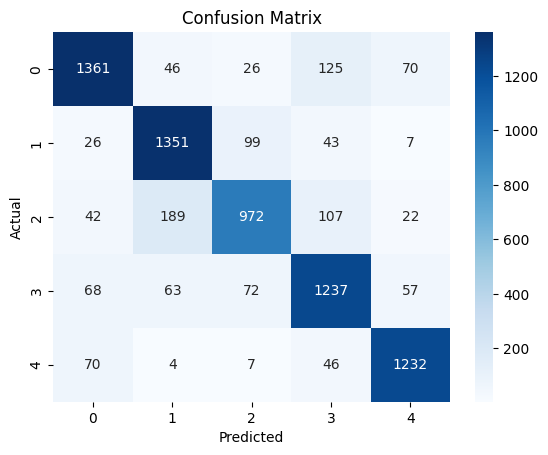

Accuracy: 0.8380550258785072


In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {accuracy}')
Model_accuracy['Logistic Regression'] = accuracy

Logistic Regression with Bagging and Boosting

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

bagging_model = BaggingClassifier(estimator=LogisticRegression(), n_estimators=50, random_state=42, n_jobs=-1)
bagging_model.fit(X_train, y_train)

boosting_model = AdaBoostClassifier(estimator=LogisticRegression(), n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)

bagging_test_score = bagging_model.score(X_test, y_test)
boosting_test_score = boosting_model.score(X_test, y_test)

print(f'Accuracy(Bagging): {bagging_test_score}')
print(f'Accuracy(Boosting): {boosting_test_score}')
Model_accuracy['LR_Bagging'] = bagging_test_score
Model_accuracy['LR_Boosting'] = boosting_test_score

Accuracy(Bagging): 0.8379188232089348
Accuracy(Boosting): 0.6477798964859711


Logistic Regression using bagging and and boosting as well as scaling,SMOT and cross validation

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

bagging_model = BaggingClassifier(estimator=LogisticRegression(), n_estimators=50, random_state=42, n_jobs=-1)
bagging_model.fit(X_train, y_train)

boosting_model = AdaBoostClassifier(estimator=LogisticRegression(), n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)

bagging_cv_scores = cross_val_score(bagging_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
boosting_cv_scores = cross_val_score(boosting_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

print(f'Accuracy(Bagging): {bagging_cv_scores.mean()}')
print(f'Accuracy(Boosting): {boosting_cv_scores.mean()}')

Model_accuracy['LR_Bagging_SMOT'] = bagging_cv_scores.mean()
Model_accuracy['LR_Boosting_SMOT'] = boosting_cv_scores.mean()

Accuracy(Bagging): 0.7898865069356872
Accuracy(Boosting): 0.6011853720050441


XGBoost Classifier





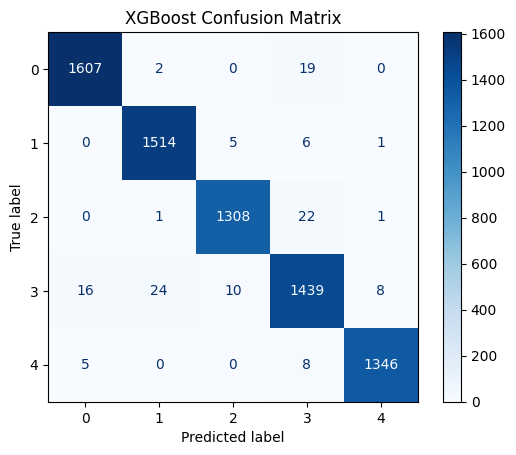

Accuracy: 0.9825660582947425


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

xgb_test_score = xgb_model.score(X_test, y_test)

y_pred_xgb = xgb_model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_display_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
cm_display_xgb.plot(cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.show()

print(f'Accuracy: {xgb_test_score}')
Model_accuracy['XGBoost'] = xgb_test_score

Support Vector Machine

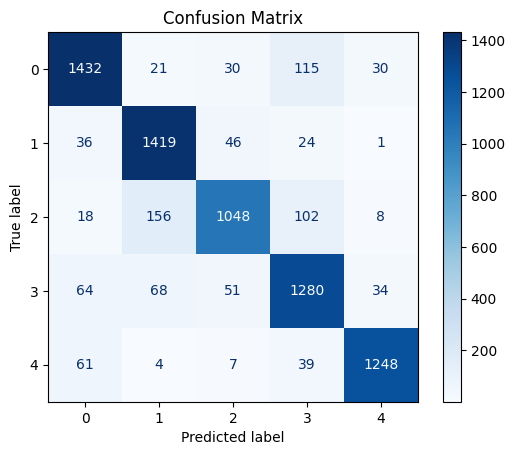

Accuracy: 0.8753745573413239


In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

svm_test_score = svm_model.score(X_test, y_test)

y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {svm_test_score}')
Model_accuracy['SVM'] = svm_test_score

Support Vector Machine with Hyperparameter Tuning and RandomizedSearchCV

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_sample, y_sample = resample(X_scaled, y, n_samples=int(0.1 * len(X)), random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

param_dist = {
    'C': np.logspace(-2, 2, 5),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=5, cv=3, scoring='accuracy', random_state=42)

random_search.fit(X_train, y_train)


best_svm_model_full = SVC(**random_search.best_params_)
best_svm_model_full.fit(X_scaled, y)

full_test_score = best_svm_model_full.score(X_test, y_test)
print(f'Accuracy: {full_test_score}')

Model_accuracy['SVM_Tuned'] = full_test_score

Accuracy: 0.9877384196185286


Support Vector Machine with XGBoost

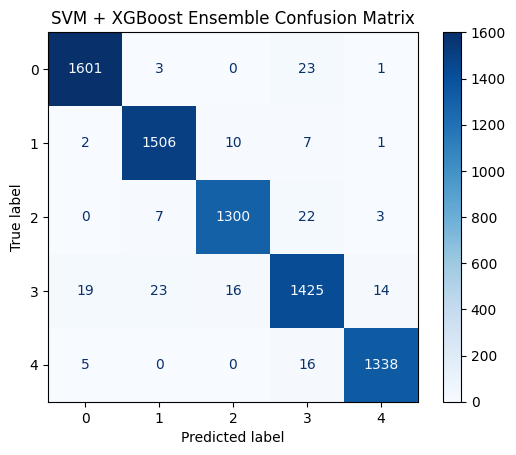

Accuracy: 0.9765731408335603


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', probability=True, random_state=42)
xgb_model = XGBClassifier( eval_metric='mlogloss', random_state=42)

ensemble_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('xgb', xgb_model)
], voting='soft')

ensemble_model.fit(X_train, y_train)

ensemble_test_score = ensemble_model.score(X_test, y_test)



y_pred_ensemble = ensemble_model.predict(X_test)
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
cm_display_ensemble = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble)
cm_display_ensemble.plot(cmap='Blues')
plt.title('SVM + XGBoost Ensemble Confusion Matrix')
plt.show()

print(f'Accuracy: {ensemble_test_score}')
Model_accuracy['SVM_XGBoost'] = ensemble_test_score

Random Forest

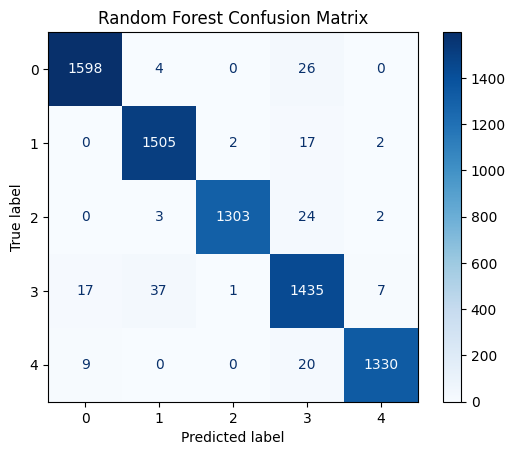

Accuracy: 0.9767093435031327


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_test_score = rf_model.score(X_test, y_test)

y_pred_rf = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
cm_display_rf.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

print(f'Accuracy: {rf_test_score}')
Model_accuracy['Random Forest'] = rf_test_score

Random Forest With Boosting

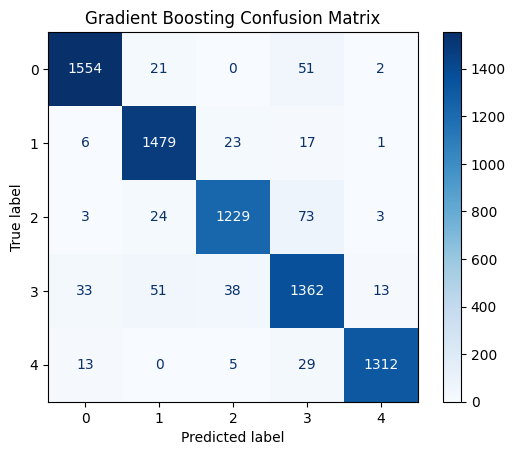

Accuracy: 0.9447017161536366


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

rf_test_score = rf_model.score(X_test, y_test)
ada_test_score = ada_model.score(X_test, y_test)
gb_test_score = gb_model.score(X_test, y_test)


y_pred_gb = gb_model.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)

cm_display_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
cm_display_gb.plot(cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

print(f'Accuracy: {gb_test_score}')
Model_accuracy['RF_Boosting'] = gb_test_score


LR + SVM (Stacking)

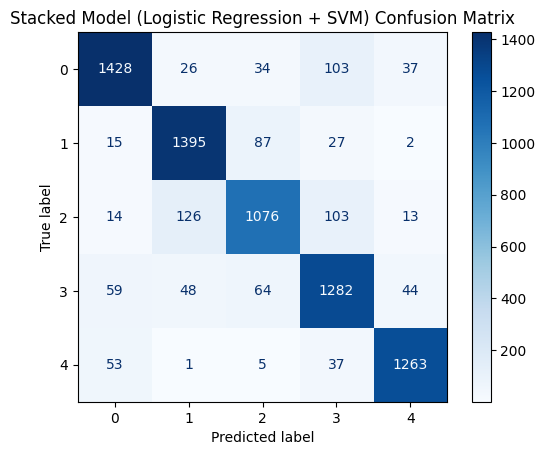

Accuracy: 0.8776900027240534


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(random_state=42)
svm_model = SVC(kernel='linear', probability=True, random_state=42)

stacked_model = StackingClassifier(
    estimators=[('lr', lr_model), ('svm', svm_model)],
    final_estimator=LogisticRegression(),
    cv=5
)

stacked_model.fit(X_train, y_train)

stacked_test_score = stacked_model.score(X_test, y_test)

y_pred_stacked = stacked_model.predict(X_test)
cm_stacked = confusion_matrix(y_test, y_pred_stacked)

cm_display_stacked = ConfusionMatrixDisplay(confusion_matrix=cm_stacked)
cm_display_stacked.plot(cmap='Blues')
plt.title('Stacked Model (Logistic Regression + SVM) Confusion Matrix')
plt.show()

print(f'Accuracy: {stacked_test_score}')
Model_accuracy['LR_SVM_Stacking'] = stacked_test_score


LR + RF (Stacking)

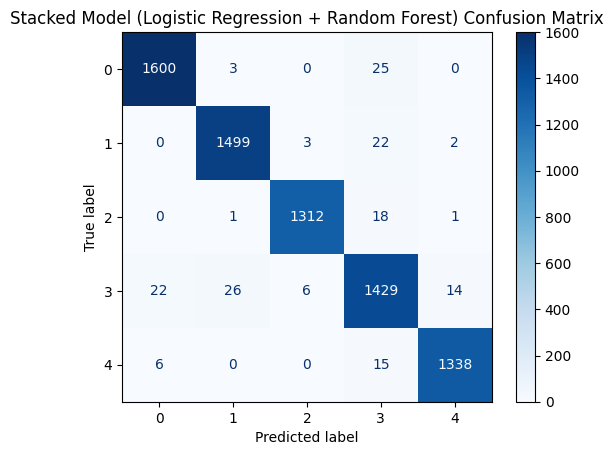

Accuracy: 0.9776627621901389


In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

stacked_model = StackingClassifier(
    estimators=[('lr', lr_model), ('rf', rf_model)],
    final_estimator=LogisticRegression(),
    cv=5
)

stacked_model.fit(X_train, y_train)

stacked_test_score = stacked_model.score(X_test, y_test)

y_pred_stacked = stacked_model.predict(X_test)
cm_stacked = confusion_matrix(y_test, y_pred_stacked)

cm_display_stacked = ConfusionMatrixDisplay(confusion_matrix=cm_stacked)
cm_display_stacked.plot(cmap='Blues')
plt.title('Stacked Model (Logistic Regression + Random Forest) Confusion Matrix')
plt.show()

print(f'Accuracy: {stacked_test_score}')
Model_accuracy['LR_RF_Stacking'] = stacked_test_score


SVM + RF (Stacking)

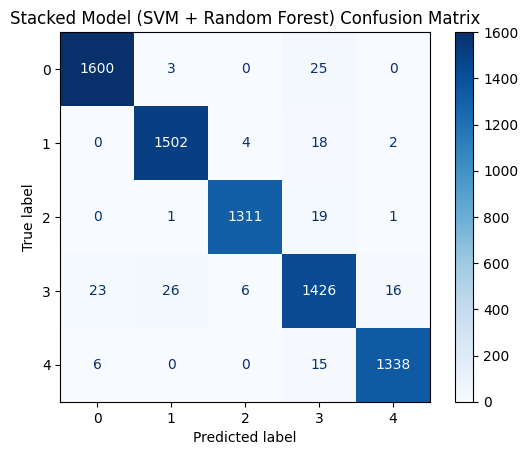

Accuracy: 0.9775265595205666


In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', probability=True, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

stacked_model = StackingClassifier(
    estimators=[('svm', svm_model), ('rf', rf_model)],
    final_estimator=LogisticRegression(),
    cv=5
)

stacked_model.fit(X_train, y_train)

stacked_test_score = stacked_model.score(X_test, y_test)

y_pred_stacked = stacked_model.predict(X_test)
cm_stacked = confusion_matrix(y_test, y_pred_stacked)

cm_display_stacked = ConfusionMatrixDisplay(confusion_matrix=cm_stacked)
cm_display_stacked.plot(cmap='Blues')
plt.title('Stacked Model (SVM + Random Forest) Confusion Matrix')
plt.show()

print(f'Accuracy: {stacked_test_score}')
Model_accuracy['SVM_RF_Stacking'] = stacked_test_score


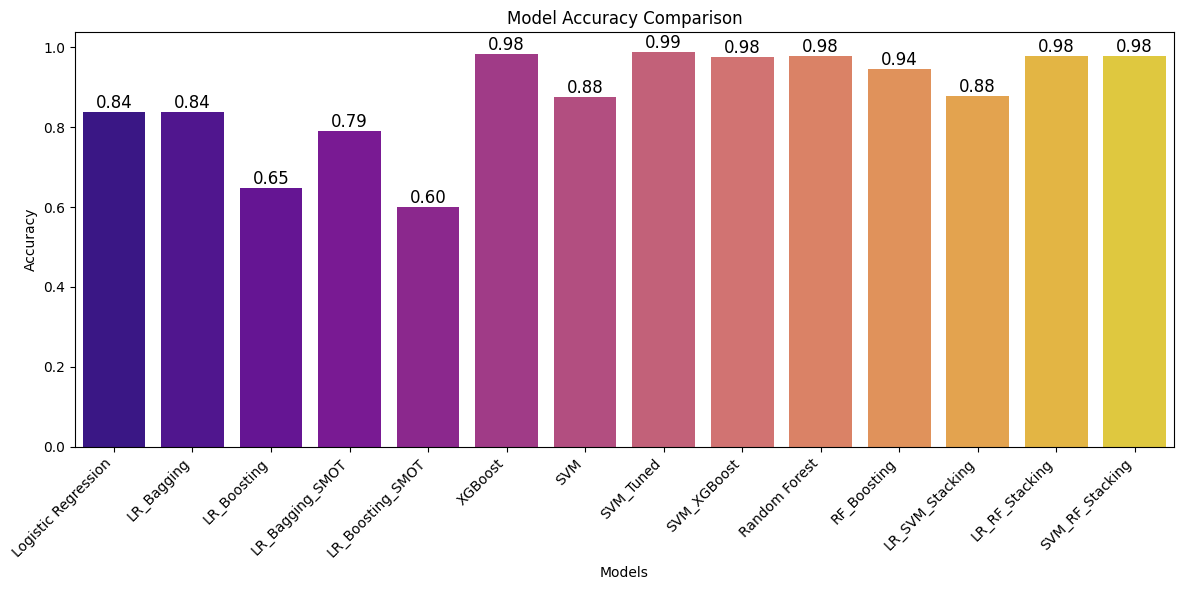

In [35]:
plt.figure(figsize=(12, 6))
ax = plt.gca()
sns.barplot(x=list(Model_accuracy.keys()), y=list(Model_accuracy.values()), palette="plasma")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.2f}'.format(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()